In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import imutils
import cv2
import numpy as np
from imutils.object_detection import non_max_suppression


Visualizamos el template y las imagenes dadas. 

Text(0.5, 1.0, 'Template')

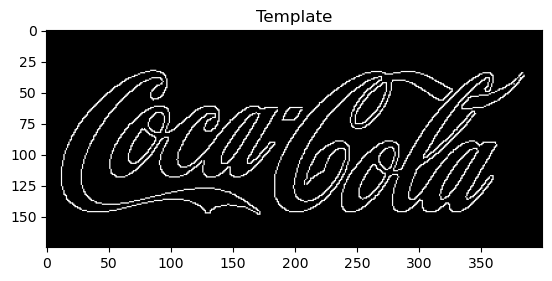

In [6]:
template = cv2.imread("pattern.png")
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.Canny(template, 50, 200)
tH, tW = template.shape[:2]
plt.imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))
plt.title('Template')

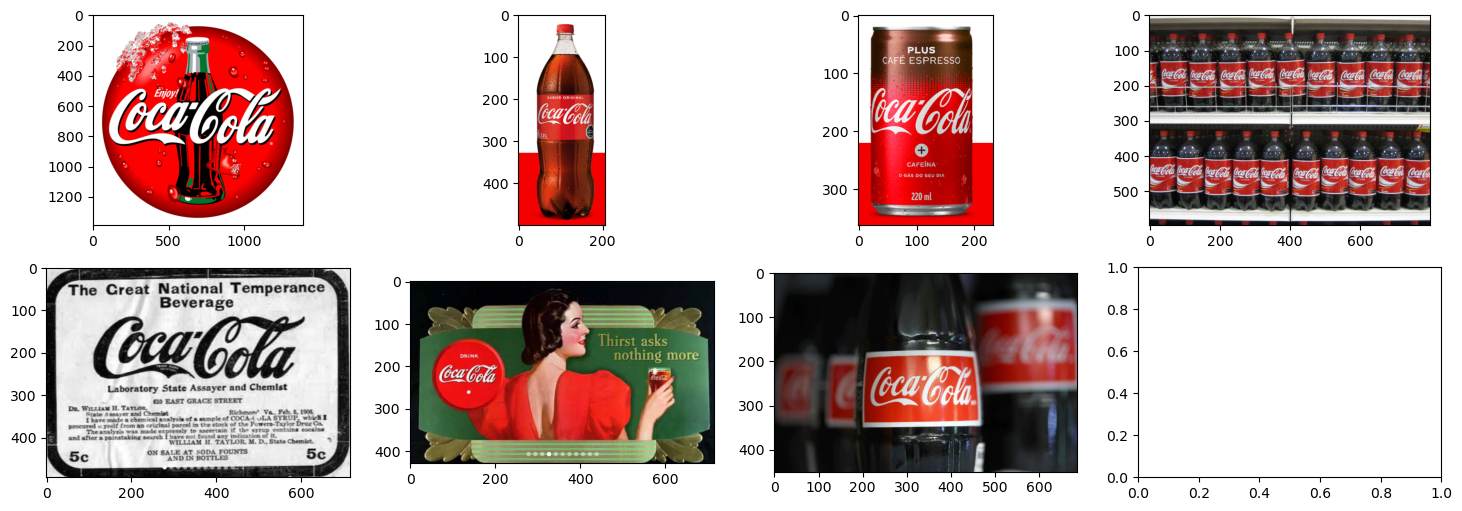

In [16]:
path='./images'
imgs = os.listdir(path)
idx=0
phs=[]
for foto in imgs:
      idx+=1
      ph=cv2.imread(os.path.join(path,foto))
      phs.append(ph)
plt.subplots(2, 4,figsize=(18,6))
for i in range(idx):
    plt.subplot(2,4,i+1)
    plt.imshow(cv2.cvtColor(phs[i], cv2.COLOR_BGR2RGB))

Podemos ver que en algunos casos el template queda mas grande o mas chico en las imagenes a detectar, por lo cual voy a optar por variar el tamaño de las mismas para obtener un match correcto con el template.

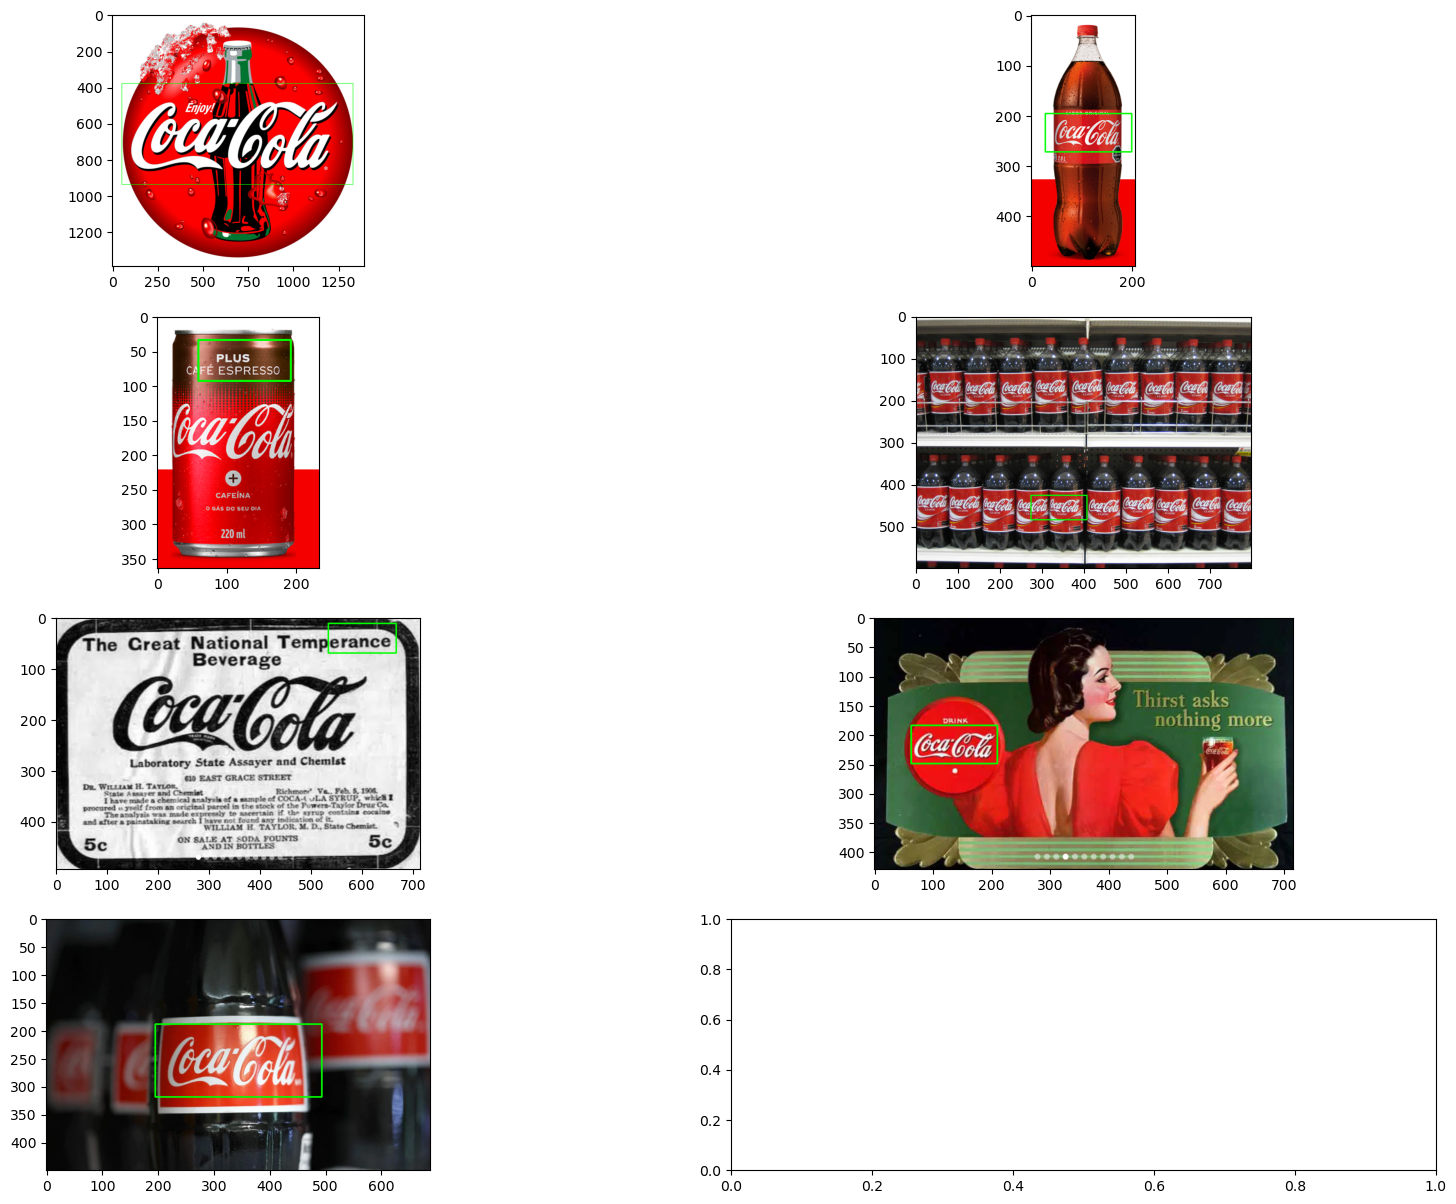

In [20]:
#utilizo deteccion de bordes con canny tanto en el template como en las imagenes para mejorar la coincidencia.
# template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.Canny(template, 50, 200)
tH, tW = template.shape[:2]

#leo imagenes a procesar
path='./images'
imgs = os.listdir(path)
ix=0
arrVal=[]
arrLoc=[]
rel=[]
imagenes=[]
for foto in imgs: # bucle para leer todas las imagenes
      ph=cv2.imread(os.path.join(path,foto))
      gray = cv2.cvtColor(ph, cv2.COLOR_BGR2GRAY)
      ix+=1
      for scale in np.linspace(0.2, 3, 50)[::-1]: #voy cambiando el tamaño de la imagen leida
            resized = imutils.resize(gray, width = int(gray.shape[1] * scale))
            if resized.shape[0] < tH or resized.shape[1] < tW:#dejamos de procesar si el tamaño de la imagen es menor al del template
               break
            r = gray.shape[1] / float(resized.shape[1])  #relacion de la imagen original y su nuevo tamaño
            edged = cv2.Canny(resized, 100, 200) 
            result = cv2.matchTemplate(edged, template, cv2.TM_CCOEFF)  
            (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)
            arrVal.append(maxVal)#guardo el valor maximo encontrado, su posicion y el valor de r 
            arrLoc.append(maxLoc)
            rel.append(r)
      #de todos los valores de coincidencia que obtuvimos con los diferentes tamaños me quedo con el mayor para cada imagen y obtengo sus coordenadas
      max_value = max(arrVal)
      loc=arrVal.index(max_value)
      rnew=rel[loc]
      copy_=arrLoc[loc]
      # finalmente dibujo el bbox de la mejor coincidencia y guardo la imagen para luego visualizarlas todas juntas
      (startX, startY) = (int(copy_[0] * rnew), int(copy_[1] * rnew))
      (endX, endY) = (int((copy_[0] + tW) * rnew), int((copy_[1] + tH) * rnew))
      cv2.rectangle(ph, (startX, startY), (endX, endY), (0, 255, 0), 2)
      imagenes.append(ph)
      arrVal=[]
      arrLoc=[]
      rel=[]   
     
fig, axs = plt.subplots(4, 2,figsize=(20,15))
for i in range(ix):
    plt.subplot(4,2,i+1)
    plt.imshow(cv2.cvtColor(imagenes[i], cv2.COLOR_BGR2RGB))
      

Podemos ver que en todas las imagenes obtuvimos una correcta deteccion pero a costa de mucho tiempo de procesamiento ya que para detectar el logo en todas las imagenes debimos cambiar el tamaño de cada una repetidas veces. 

Parte 2

Text(0.5, 1.0, 'Template')

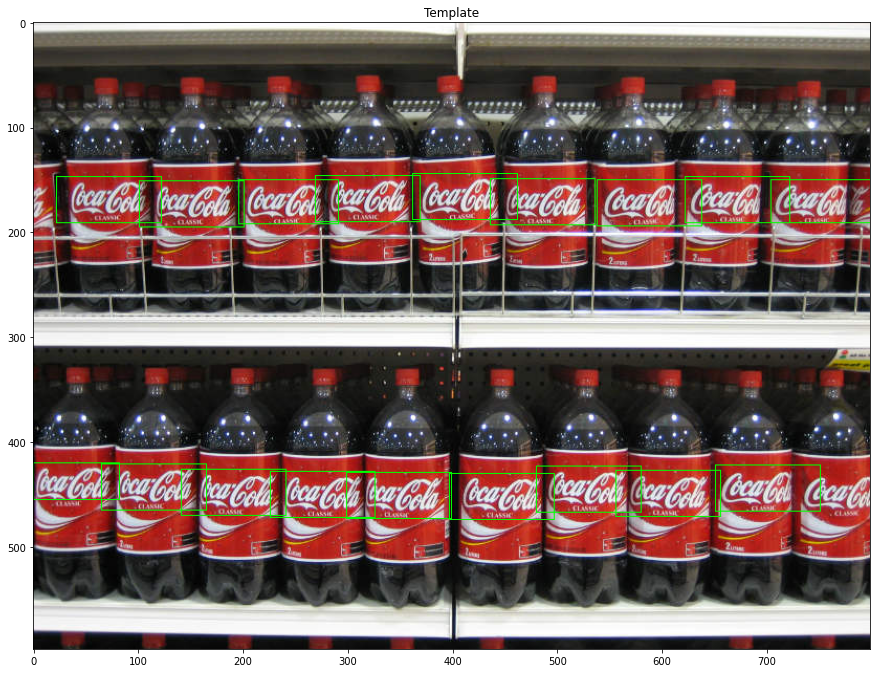

In [17]:
import os
import imutils
import cv2
import numpy as np
template = cv2.imread("pattern.png")
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.Canny(template, 50, 200)
(tH, tW) = template.shape[:2]

#Leo imagenes a procesar
path='./imagenes'
imgs = os.listdir(path)
arrVal=[]
arrLoc=[]
rel=[]
th=0.06
coord=[]
non_repeated = []
for foto in imgs:
      ph=cv2.imread(os.path.join(path,foto))
      gray = cv2.cvtColor(ph, cv2.COLOR_BGR2GRAY)
      for scale in np.linspace(4, 6,10)[::-1]:
            resized = imutils.resize(gray, width = int(gray.shape[1] * scale))
            r = gray.shape[1] / float(resized.shape[1])
            if resized.shape[0] < tH or resized.shape[1] < tW:
               break
            edged = cv2.Canny(resized, 200, 255)
            result = cv2.matchTemplate(edged, template, cv2.TM_CCOEFF_NORMED)
            loc = np.where( result >= th)
            for pt in zip(*loc[::-1]):
                  coord.append((  int(pt[0]*r)  ,  int(pt[1]*r)  ,  int((pt[0] + tW)*r)  ,  int((pt[1] + tH)*r) )) 
            non_repeated = non_max_suppression(np.array(coord))

for (xb, yb, xe, ye) in non_repeated:
	cv2.rectangle(ph, (xb, yb), (xe, ye), (0, 255, 0), 1)
plt.figure(figsize=(15,15))
plt.imshow(cv2.cvtColor(ph, cv2.COLOR_BGR2RGB))
plt.title('Template')  